In [2]:
from sklearn.linear_model import LinearRegression
import pandas

# Import data
dt = pandas.read_csv('height_and_weight.csv')


In [3]:
# Remove the first row of column in data, as we do not need that here
dt.drop(columns=['Index'], inplace=True)


In [4]:
# Get input X data, that is the 'Height' column
# We need the data to be in a 2D-array (DataFrame), which is on the following format:
    # dt.drop(columns=['Weight(lbs)']).values
# To get a 1D-array (Series), we would do the following instead:
    # dt['Height(In)'].values

inp_x = dt.drop(columns=['Weight(lbs)'])

# Get output data, that is the 'Weight' column
out_y = dt.drop(columns=['Height(In)'])


array([[<AxesSubplot:title={'center':'Height(In)'}>,
        <AxesSubplot:title={'center':'Weight(lbs)'}>]], dtype=object)

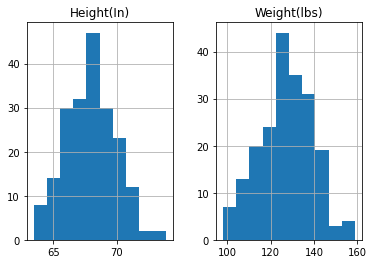

In [5]:
# View how the data is distibuted
dt.hist()


array([<AxesSubplot:title={'center':'Height(In)'}>,
       <AxesSubplot:title={'center':'Weight(lbs)'}>], dtype=object)

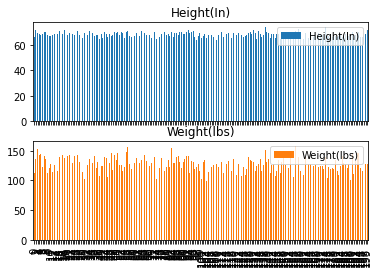

In [6]:
# Or as a barchart
dt.plot.bar(subplots=True)


<AxesSubplot:>

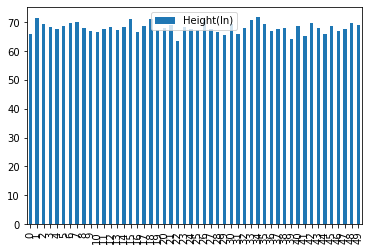

In [7]:
# Get the first 50 values of the data, plotted in a bar chart
# Done to view if the dataset has a normal distribution (or a uniformed distribution) of the datab
inp_x.head(50).plot.bar()


In [8]:
# Create our model for ML
Model = LinearRegression()

# Then, train the model with the input and output using the fit-method
Model.fit(inp_x, out_y)


LinearRegression()

In [9]:
# Let the model now predict something
Model.predict([[60]])     # Person with 60 inches in height, would thereby be about 99.9 lbs in weight


array([[99.93286131]])

In [10]:
from sklearn.model_selection import train_test_split

# Divide the data into training set and testing set
height = dt.drop(columns=['Weight(lbs)'])
weight = dt.drop(columns=['Height(In)'])

# Training set
inp_x2 = height.values[:180]
out_y2 = weight.values[:180]

# Testing set
tst_x = height.values[180:]
tst_y = weight.values[180:]


# Use sklearn to divide the data into testing and training sets
#   inp_x2, tst_x, out_y2, tst_y = train_test_split(height, weight, test_size = 0.1)


In [11]:
# Train the model with the training set
Model2 = LinearRegression()
Model2.fit(inp_x2, out_y2)


LinearRegression()

In [12]:
# And the use the testing set to predict the outcome of the model
pred_y = Model2.predict(tst_x)


<AxesSubplot:>

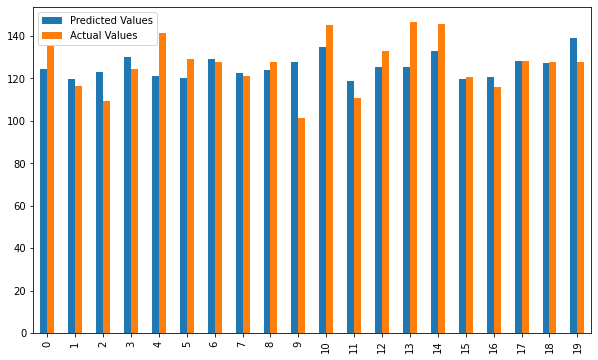

In [13]:
# Make a comparison with the actual data, and the predicted data
# flatten() is used to make a 2D-array into a 1D-array, else we get an error
cmp = pandas.DataFrame({'Predicted Values': pred_y.flatten(),
                        'Actual Values': tst_y.flatten()})

# Visualize the comparison, with enlargen plot bar chart
cmp.plot.bar(figsize=(10,6))


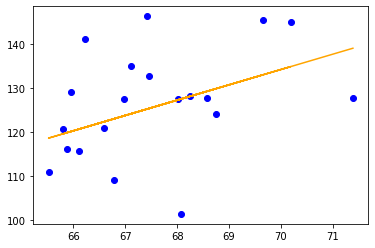

In [16]:
from matplotlib import pyplot
# Scatter chart of data points
pyplot.scatter(tst_x, tst_y, color = 'blue')

# Plot a line on the same graph, of the testing set (x-values) and the predicted outcomes
pyplot.plot(tst_x, pred_y, color = 'orange')


In [17]:
from sklearn import metrics

# What is the maximum error of the predicted outcome, and the actual outcome of tests
metrics.max_error(tst_y, pred_y)


26.103262068968718

In [18]:
# What is the mean value of error within the datapoints
metrics.mean_absolute_error(tst_y, pred_y)


8.620489049733717